# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# from unityagents import UnityEnvironment
# import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
# env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# # get the default brain
# brain_name = env.brain_names[0]
# brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# # reset the environment
# env_info = env.reset(train_mode=True)[brain_name]

# # number of agents 
# num_agents = len(env_info.agents)
# print('Number of agents:', num_agents)

# # size of each action
# action_size = brain.vector_action_space_size
# print('Size of each action:', action_size)

# # examine the state space 
# states = env_info.vector_observations
# state_size = states.shape[1]
# print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### Execution Parameters

In [7]:
episodes     = 2500
goal_score   = 0.5

is_learning  = True # True: Training mode, False: Demo mode
stop_at_goal = True # True: Training stops at the episode when goal is achieved, False: Finishes all episodes

checkptfile  = 'tennis_ddpg.ckpt' # File name format for model checkpoint files

#### Hyper Parameters

In [8]:
SEED                = 0
REPLAY_BUFFER_SIZE  = 1e+6 # DDPG Paper = 1e+6
ACTOR_LR            = 1e-4 # DDPG Paper = 1e-4
CRITIC_LR           = 1e-3 # DDPG Paper = 1e-3
GAMMA               = 0.99 # DDPG Paper = 0.99
TAU                 = 1e-2 # DDPG Paper = 1e-3
BATCH_SIZE          = 512  # DDPG Paper = 32
WEIGHT_DECAY        = 0    # DDPG Paper = 1e-2
HIDDEN_NODES        = [256, 128] # DDPG Paper = 400, 300

#### Back-up checkpoint files from prior runs

In [9]:
import glob
import os
import shutil

ckpts = glob.glob(checkptfile.split('.')[0] + '*' + '.ckpt')

for ckpt in ckpts:
    print(f'Backing up : {ckpt}')
    shutil.copy2(ckpt, ckpt + '.bkp')

#### Load Unity environment
Linux version is available [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Linux.zip)


In [10]:
from unityagents import UnityEnvironment

In [11]:
if is_learning:
    env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64', no_graphics=True)
else:
    env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [12]:
brain_name  = env.brain_names[0]
env_info    = env.reset(train_mode=True)[brain_name]
brain       = env.brains[brain_name]

num_agents  = len(env_info.agents)
states      = env_info.vector_observations
action_size = brain.vector_action_space_size
state_size  = states.shape[1]

print(f'Env has {num_agents} agents. Total states = {state_size}, Possible actions = {action_size}')

Env has 2 agents. Total states = 24, Possible actions = 2


#### Util Classes

In [13]:
import torch as T

class CheckDevice(object):
    """
    Check if a compatible graphics card is available
    """
    def __init__(self):
        if T.cuda.is_available():
            self._device = T.device('cuda:0')
            print(f'Using CUDA: {T.cuda.get_device_name()}')
        else:
            self._device = T.device('cpu')
            print('Using CPU')
    
    @property
    def device(self):
        return self._device
    
DEVICE = CheckDevice().device

Using CUDA: GeForce RTX 2060 SUPER


In [14]:
# Ornstein-Uhlenbeck Noise
# More info https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

import numpy as np

class OUNoise:
    """Ornstein-Uhlenbeck Noise.
    theta >0 : Speed of reversion
    sigma >0 : The standard deviation parameter, determines volatility
    W_{t}    : Wiener process
    mu       : Drift term - long term mean level
    Default values from DDPG paper: theta=0.15, sigma=0.20
    DDPG Paper: https://arxiv.org/pdf/1509.02971.pdf
    """
    def __init__(self, action_len, seed=0, theta=0.15, sigma=0.20, mu=0):
        self.action_len = action_len
        self.seed  = seed
        self.theta = theta
        self.sigma = sigma
        self.mu = mu
        
        np.random.seed(self.seed)
        self.reset()

    def reset(self):
        self.state = np.ones(self.action_len) * self.mu

    def add_noise(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state

In [15]:
from collections import namedtuple, deque
import random

class ReplayBuffer:
    """
    Experience('state', 'action', 'next_state', 'reward', 'done')
    Default values from DDPG paper: Replay buffer size = 1e+6
    DDPG Paper: https://arxiv.org/pdf/1509.02971.pdf
    """
    def __init__(self, capacity=1e+6, seed=0):
        self.memory     = deque(maxlen=int(capacity))
        self.seed       = random.seed(seed)
        self.device     = DEVICE
        self.experience = namedtuple("Experience", 
                                     field_names=["state", "action", "reward", "next_state", "done"])
    
    def save(self, state, action, reward, next_state, done):
        experience = self.experience(state, action, reward, next_state, done)
        self.memory.append(experience)
    
    def retrieve(self, batch_size):
        experiences = random.sample(self.memory, k=batch_size)
        return experiences

    def __len__(self):
        return len(self.memory)

#### DDPG Classes

In [16]:
import math

import torch as T
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    """
    Enhancement TODO: Add Batch Normalization to match DDPG paper
    
    DDPG paper (https://arxiv.org/pdf/1509.02971.pdf) ref:
    ------------------------------------------------------
    We used Adam (Kingma & Ba, 2014) for learning the neural network parameters 
    with a learning rate of 10−4 and 10−3 for the actor and critic respectively.
    
    The low-dimensional networks had 2 hidden layers with 400 and 300 units 
    respectively (≈ 130,000 parameters). 
    
    Actions were not included until the 2nd hidden layer of Q. 
    
    << When learning from pixels we used 3 convolutional layers
    (no pooling) with 32 filters at each layer. >> 
    
    This was followed by two fully connected layers with 200 units. 
    
    The final layer weights and biases of both the actor and critic
    were initialized from a uniform distribution [−3 × 10−3, 3 × 10−3] 
    """
    def __init__(self, states_len, actions_len, lr=1e-4, hidden_nodes=[400, 300], seed=0, name='actor'):
        super(Actor, self).__init__()

        self.seed   = T.manual_seed(seed)
        self.device = DEVICE
        
        self.states_len  = states_len
        self.actions_len = actions_len
        self.hidden_in   = hidden_nodes[0]
        self.hidden_out  = hidden_nodes[1]
        self.name        = name
        
        self.inp = nn.Linear(self.states_len, self.hidden_in)
        self.h1  = nn.Linear(self.hidden_in, self.hidden_out)
        self.out = nn.Linear(self.hidden_out, self.actions_len)
        
        self.init_WandB(self.inp)
        self.init_WandB(self.h1)
        self.init_WandB(self.out, stdv_sigma=3e-3)

        # Convert the tensors based on available device
        self.to(self.device)

    def init_WandB(self, layer, stdv_sigma=None):
        """
        Initialize weights and biases for a better convergence
        """
        # Find standard deviation
        if stdv_sigma is None:
            stdv_sigma = 1. / math.sqrt(layer.weight.data.size()[0])

        # Use the stdv as the upper and lower boundary
        T.nn.init.uniform_(layer.weight.data, -stdv_sigma, stdv_sigma)
        T.nn.init.uniform_(layer.bias.data, -stdv_sigma, stdv_sigma)

    def forward(self, states):
        """
        Build the policy/actor network that maps states to actions.
        Using Tanh activation as per DDPG paper
        """
        l1_states  = F.relu(self.inp(states))
        l2_states  = F.relu(self.h1(l1_states))
        l3_actions = T.tanh(self.out(l2_states))

        return l3_actions
    
    def save_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        T.save(self.state_dict(), filename)
        
    def load_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        self.load_state_dict(T.load(filename))
        
# if __name__ == '__main__':
#     actor = Actor(33,4, hidden_nodes=[33//2, 33//4])
#     print(f'{actor}')

In [17]:
import math

import torch as T
import torch.nn as nn
import torch.nn.functional as F

class Critic(nn.Module):
    """
    DDPG paper (https://arxiv.org/pdf/1509.02971.pdf) ref:
    ------------------------------------------------------
    We used Adam (Kingma & Ba, 2014) for learning the neural network parameters 
    with a learning rate of 10−4 and 10−3 for the actor and critic respectively.
    
    The low-dimensional networks had 2 hidden layers with 400 and 300 units 
    respectively (≈ 130,000 parameters). 
    
    Actions were not included until the 2nd hidden layer of Q. 
    
    << When learning from pixels we used 3 convolutional layers
    (no pooling) with 32 filters at each layer. >> 
    
    This was followed by two fully connected layers with 200 units. 
    
    The final layer weights and biases of both the actor and critic
    were initialized from a uniform distribution [−3 × 10−3, 3 × 10−3] 
    """
    def __init__(self, states_len, actions_len, lr=1e-3, hidden_nodes=[400, 300], seed=0, name='critic'):
        super(Critic, self).__init__()
        
        self.seed   = T.manual_seed(seed)
        self.device = DEVICE
        
        self.states_len  = states_len
        self.actions_len = actions_len
        self.hidden_in   = hidden_nodes[0]
        self.hidden_out  = hidden_nodes[1]
        self.name        = name
        
        self.inp = nn.Linear(self.states_len, self.hidden_in)
        self.h1  = nn.Linear(self.hidden_in + actions_len, self.hidden_out)
        self.out = nn.Linear(self.hidden_out, 1)
        
        self.init_WandB(self.inp)
        self.init_WandB(self.h1)
        self.init_WandB(self.out, stdv_sigma=3e-3)
        
        self.to(self.device)

    def init_WandB(self, layer, stdv_sigma=None):
        """
        Initialize weights and biases for a better convergence
        """
        # Find standard deviation
        if stdv_sigma is None:
            stdv_sigma = 1. / math.sqrt(layer.weight.data.size()[0])

        # Use the stdv as the upper and lower boundary
        T.nn.init.uniform_(layer.weight.data, -stdv_sigma, stdv_sigma)
        T.nn.init.uniform_(layer.bias.data, -stdv_sigma, stdv_sigma)

    def forward(self, state, action):
        l1_states         = F.relu(self.inp(state))
        l1_states_actions = T.cat((l1_states, action), dim=1)
        l2_states_actions = F.relu(self.h1(l1_states_actions))
        l3_states_actions = self.out(l2_states_actions)
        
        return l3_states_actions
    
    def save_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        T.save(self.state_dict(), filename)
        
    def load_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        self.load_state_dict(T.load(filename))

In [18]:
import torch.optim as optim

class Agent():
    def __init__(self, state_size, action_size, num_agents, seed=0):
        self.device = DEVICE
        
        self.state_size  = state_size
        self.action_size = action_size
        self.num_agents  = num_agents
        self.seed        = seed

        self.actor_local      = Actor(state_size, action_size, hidden_nodes=HIDDEN_NODES, seed=self.seed, name='lactor')
        self.actor_target     = Actor(state_size, action_size, hidden_nodes=HIDDEN_NODES, seed=self.seed, name='tactor')
        self.actor_optimizer  = optim.Adam(self.actor_local.parameters(), lr=ACTOR_LR)
        
        self.critic_local     = Critic(state_size, action_size, hidden_nodes=HIDDEN_NODES, seed=self.seed, name='lcritic')
        self.critic_target    = Critic(state_size, action_size, hidden_nodes=HIDDEN_NODES, seed=self.seed, name='tcritic')
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=CRITIC_LR, weight_decay=WEIGHT_DECAY)
        
        self.noise  = OUNoise(action_size, seed=SEED)
        self.memory = ReplayBuffer(seed=SEED)
        
    def step(self, states, actions, rewards, next_states, dones):
        # Save experience to memory, for each agent
        for i in range(self.num_agents):
            self.memory.save(states[i,:], actions[i,:], rewards[i], next_states[i,:], dones[i])

        # Learn by memory exploitation
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.retrieve(BATCH_SIZE)
            self.learn(experiences, GAMMA)

    def get_next_action(self, states, add_noise=True):
        states  = T.from_numpy(states).float().to(self.device)
        actions = np.zeros((self.num_agents, self.action_size))
        self.actor_local.eval()
        with T.no_grad():
            for agent_num, state in enumerate(states):
                # Get action values for each agent
                action = self.actor_local(state).cpu().data.numpy()
                # Append the actions for each agent
                actions[agent_num, :] = action
        self.actor_local.train()
        if add_noise:
            actions += self.noise.add_noise()
        # Set -1 to 1 boundary before returning the action value 
        # as per instruction "Every entry in the action vector should be a number between -1 and 1."
        return np.clip(actions, -1, 1)

    def reset(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        # Rearrange the tensors to use with learning 
        states      = T.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions     = T.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(self.device)
        rewards     = T.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = T.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones       = T.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)

        # Get predicted next-state actions and Q values from target models
        actions_next   = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        Q_expected  = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        # Normalize gradients to avoid high gradients
        T.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        actions_pred = self.actor_local(states)
        # Getting the average value from Critic to compare against Actor action
        actor_loss   = -self.critic_local(states, actions_pred).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # Update networks
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def save_models(self, filename):
        self.actor_local.save_model(filename)
        self.actor_target.save_model(filename)
        self.critic_local.save_model(filename)
        self.critic_target.save_model(filename)
        
    def load_models(self, filename):
        self.actor_local.load_model(filename)
        self.actor_target.load_model(filename)
        self.critic_local.load_model(filename)
        self.critic_target.load_model(filename)


### Instantiate an agent

In [19]:
agent = Agent(state_size, action_size, num_agents, seed=0)

### Training the agent

In [20]:
import datetime
import math
from pytictoc import TicToc

scores     = []
avg_scores = []
avg_score, max_avg_score = None, None
goal_ep    = 0

if is_learning:
    print(f'Target Goal: {goal_score}')
    t = TicToc()
    t.tic()
    for ep in range(1, episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states   = env_info.vector_observations
        done     = False
        reward   = 0.

        while not done:
            actions     = agent.get_next_action(states)
            env_info    = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards     = env_info.rewards
            dones       = env_info.local_done

            agent.step(states, actions, rewards, next_states, dones)

            reward  += np.max(rewards)
            states   = next_states
            done     = np.any(dones)

        scores.append(reward)
        avg_score = np.mean(scores[-100:])
        avg_scores.append(avg_score)
        
        perf    = [f'{scr:1.1f}' for scr in scores[-3:]] # Last 3 scores
        elapsed = str(datetime.timedelta(seconds=math.ceil(t.tocvalue()))) # Removing Microseconds with ceil()

        if max_avg_score is None or max_avg_score < avg_score:
            max_avg_ep    = ep
            
            if ep / episodes > .1:
                # Save models after at least 10% of episodes are complete *and* when there is improvement
                agent.save_models(checkptfile)
                print(f'\rModels Saved at {max_avg_ep}. Max score changed from {max_avg_score:3.2f} to {avg_score:3.2f}, Time Elapsed = {elapsed}                      ', end='')
            max_avg_score = avg_score

        print(f'\r{ep:5d}/{episodes}: Last3 = {perf} << Last 100 Avg = {avg_score:3.2f}, Max Avg = {max_avg_score:3.2f} >> Elapsed = {elapsed}    ', end='')

        if ep % 100 == 0:
            print('')

        if ep / episodes == .1:
            # Save models when 10% of episodes are complete. This is a one time process
            agent.save_models(checkptfile)
            print(f'\rModels Saved at {max_avg_ep}. Max score changed from {max_avg_score:3.2f} to {avg_score:3.2f}, Time Elapsed = {elapsed}                      ', end='')
            
        if goal_ep:
            # Already solved. Better model gets updated during 'avg' section. Not required to overwrite
            continue 
            
        if avg_score >= goal_score:
            print(f'\n\nSolved in {ep} episodes - Received an average score of {avg_score:4.2f} in last 100')
            agent.save_models(checkptfile)
            goal_ep = ep
            if stop_at_goal:
                break

    print('\nTraining completed. Models saved.')

Target Goal: 0.5
  100/2500: Last3 = ['0.0', '0.0', '0.0'] << Last 100 Avg = 0.00, Max Avg = 0.00 >> Elapsed = 0:00:13    
  200/2500: Last3 = ['0.0', '0.0', '0.0'] << Last 100 Avg = 0.01, Max Avg = 0.01 >> Elapsed = 0:00:28    
  300/2500: Last3 = ['0.0', '0.0', '0.0'] << Last 100 Avg = 0.02, Max Avg = 0.02 >> Elapsed = 0:00:47    
  400/2500: Last3 = ['0.0', '0.1', '0.1'] << Last 100 Avg = 0.04, Max Avg = 0.04 >> Elapsed = 0:01:09    
  500/2500: Last3 = ['0.1', '0.1', '0.2'] << Last 100 Avg = 0.10, Max Avg = 0.10 >> Elapsed = 0:01:43    
  600/2500: Last3 = ['0.0', '0.3', '0.3'] << Last 100 Avg = 0.22, Max Avg = 0.22 >> Elapsed = 0:02:43    
  700/2500: Last3 = ['0.5', '0.7', '0.0'] << Last 100 Avg = 0.50, Max Avg = 0.50 >> Elapsed = 0:04:40    
  701/2500: Last3 = ['0.7', '0.0', '0.7'] << Last 100 Avg = 0.50, Max Avg = 0.50 >> Elapsed = 0:04:41    

Solved in 701 episodes - Received an average score of 0.50 in last 100

Training completed. Models saved.


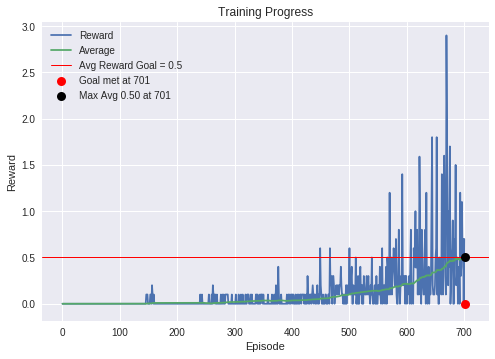

In [21]:
from matplotlib import pyplot as plt

if (is_learning):
    # plt.style.use(plt.style.available[random.randint(0, len(plt.style.available)-1)])
    plt.style.use('seaborn')
    plt.title('Training Progress')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.plot(scores, label='Reward')
    plt.plot(avg_scores, label='Average')
    plt.axhline(y=goal_score, color='red', linestyle='-', lw=1, label=f'Avg Reward Goal = {goal_score}', ds='steps')
    plt.scatter(x=goal_ep, y=0, color='red', lw=2., zorder=3, label=f'Goal met at {goal_ep}')
    plt.scatter(x=max_avg_ep, y=max_avg_score, color='black', lw=2., zorder=3, label=f'Max Avg {max_avg_score:3.2f} at {max_avg_ep}')
    plt.legend()
    plt.plot()
    plt.savefig(f'tennis_ddpg_{int(max_avg_score * 100)}.png')

### Trained Agent - Demo

In [22]:
agent.load_models(checkptfile)

env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
score  = 0

while True:
    actions  = agent.get_next_action(states, add_noise=False)                    
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    rewards  = env_info.rewards                        
    dones    = env_info.local_done                 
    score   += np.max(rewards)
    states   = next_states                              
    if np.any(dones):
        print(f'Game over! Player {int(np.argmax(rewards)) + 1} won!!')
        break
        
print(f'Ball was bounced for a total of {int(score * 10)} times by both players.')

Game over! Player 1 won!!
Ball was bounced for a total of 52 times by both players.


In [23]:
env.close()